<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/RNN_LSTM_100Epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('dataset1.csv',)

In [5]:
data_sun = data[['UNIXTime','Radiation']].iloc[:31000,:]
data_sun.set_index('UNIXTime',drop=True,inplace=True)


In [6]:
MMS = MinMaxScaler()
data_sun[data_sun.columns] = MMS.fit_transform(data_sun)

In [7]:
training_size = round(len(data_sun) * 0.80)
train_data = data_sun[:training_size]
test_data  = data_sun[training_size:]

In [8]:
def create_sequence(dataset,sequence_len):
  sequences = []
  labels = []
  start_idx = 0
  for stop_idx in range(sequence_len,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [9]:
X_train, y_train = create_sequence(train_data,100)
X_val, y_val = create_sequence(test_data,100)


In [10]:
model = Sequential()
model.add(LSTM(units = 64, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units = 32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [11]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/100
772/772 [==============================] - 88s 108ms/step - loss: 0.0040 - mean_absolute_error: 0.0323 - val_loss: 0.0020 - val_mean_absolute_error: 0.0246
Epoch 2/100
772/772 [==============================] - 82s 106ms/step - loss: 0.0032 - mean_absolute_error: 0.0272 - val_loss: 0.0016 - val_mean_absolute_error: 0.0194
Epoch 3/100
772/772 [==============================] - 81s 105ms/step - loss: 0.0031 - mean_absolute_error: 0.0259 - val_loss: 0.0015 - val_mean_absolute_error: 0.0171
Epoch 4/100
772/772 [==============================] - 82s 106ms/step - loss: 0.0030 - mean_absolute_error: 0.0251 - val_loss: 0.0015 - val_mean_absolute_error: 0.0165
Epoch 5/100
772/772 [==============================] - 85s 110ms/step - loss: 0.0029 - mean_absolute_error: 0.0243 - val_loss: 0.0015 - val_mean_absolute_error: 0.0159
Epoch 6/100
772/772 [==============================] - 83s 107ms/step - loss: 0.0029 - mean_absolute_error: 0.0243 - val_loss: 0.0018 - val_mean_absolute_error:

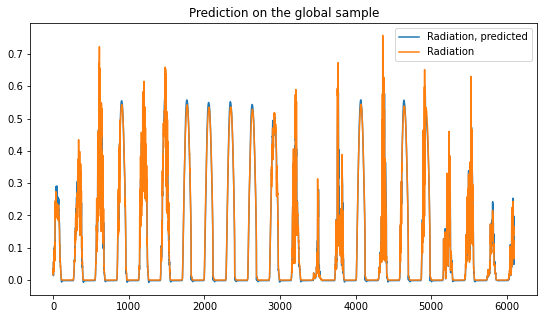

In [12]:
test_predicted = model.predict(X_val)

fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(test_predicted,label='Radiation, predicted')
plt.plot(y_val,label="Radiation")
plt.title('Prediction on the global sample')
plt.legend()

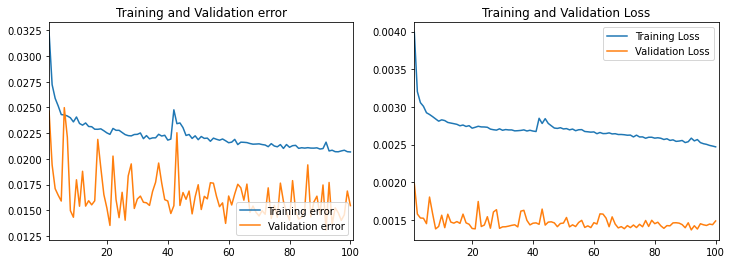

In [13]:
error = history.history['mean_absolute_error']
val_error = history.history['val_mean_absolute_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(val_error)+1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, error, label='Training error')
plt.plot(epochs_range, val_error, label='Validation error')
plt.legend(loc='lower right')
plt.xlim(1, len(val_error)+1)
plt.title('Training and Validation error')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(1, len(val_error)+1)
plt.title('Training and Validation Loss')
plt.show()

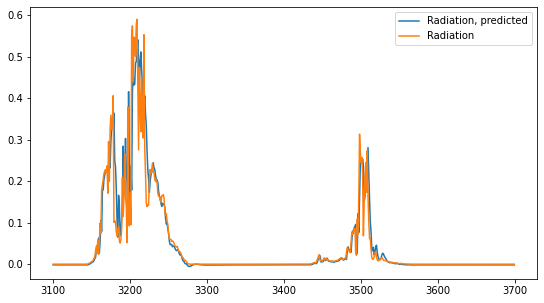

In [14]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(np.arange(3100,3700),test_predicted[3100:3700],label='Radiation, predicted')
plt.plot(np.arange(3100,3700),y_val[3100:3700],label="Radiation")
plt.legend()

In [15]:
from sklearn import metrics
score = metrics.mean_squared_error(y_val,test_predicted)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.0014866433427952774


In [16]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_val,test_predicted)
print("Final score (MAE): {}".format(MAE))

Final score (MAE): 0.01545383957402794


In [17]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(test_predicted,y_val))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.038557014184130975


In [18]:
from sklearn.metrics import r2_score
R2 = r2_score(y_val, test_predicted, multioutput='variance_weighted')
print("Final score (R2): {}".format(R2))

Final score (R2): 0.9476844127116596


In [19]:
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis

print("Final score (skew):")
print(skew(test_predicted, axis=0, bias=True))

Final score (skew):
[1.4280171]


In [20]:
print("Final score (kurtosis):")
print(kurtosis(test_predicted, axis=0, bias=True))

Final score (kurtosis):
[0.6208563]
